In [2]:
%matplotlib inline
# 위 코드는 plot 출력을 notebook에서 바로 하도록 하는 함수로 '꼭' 코드 맨 윗줄에 추가한다.

In [3]:
import numpy as np
from scipy.misc import imread, imresize, imsave
import matplotlib.pyplot as plt
import math
# import 예시

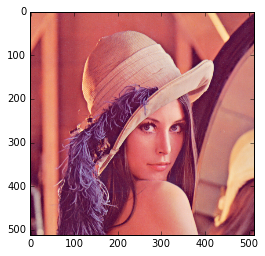

(512, 512, 3)


In [4]:
img = imread('assets/Lenna.png')
plt.imshow(img)
plt.show()
print img.shape

# code 예시

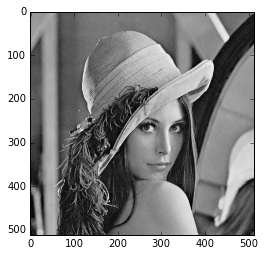

In [5]:
# convert a RGB image to grayscale

# TODO
gray = imread('assets/Lenna.png',False,"L")
plt.imshow(gray, cmap = plt.get_cmap('gray'))
# plot grayscale image
imsave('assets/Lenna(gray).png',gray)

## 흑백이미지로 변경한 코드에 대한 추가 설명

#### imread 메써드를 사용

#### imshow 에 cmap 옵션을 추가해서 gray로 출력


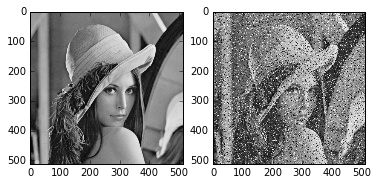

In [7]:
# Problem1: Add salt and pepper noise

# TODO
original = imread('assets/Lenna(gray).png') # 원본 출력용 이미지
input_image = imread('assets/Lenna(gray).png') # 바꿀 이미지
copy_image = input_image
noise_probability = 0.2 # 노이즈 확률
salt_probability = 0.5 # salt 확률

for i in range (input_image.shape[0]): 
    for j in range (input_image.shape[1]): # for 2개로 이미지 픽셀 전체를 돌 수 있게 한다.
        if np.random.random((1,1))<noise_probability: # 노이즈 확률안에 있을때
            if np.random.random((1,1))<salt_probability: # salt 확률 안에 있을때
                copy_image[i][j]=255
            else: # 나머지(pepper확률)
                copy_image[i][j]=0
                
plt.subplot(1,2,1)
plt.imshow(original,cmap = plt.get_cmap('gray'))# 원본 출력

plt.subplot(1,2,2)
plt.imshow(copy_image,cmap = plt.get_cmap('gray')) # 노이즈 결과물 출력
imsave('assets/Lenna(salt_pepper).png',copy_image)


# 문제1: salt and pepper noise 코드에 대한 상세한 설명

#### for문 두 개로 픽셀 전체를 훑을 수 있게 하여 그 픽셀이 노이즈 확률에 들어가고 salt 확률 안에 있을 때는 255로 바꿔주고

#### salt 확률 밖에 있으면 0으로 바꿔주었다. 


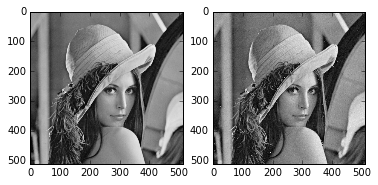

In [6]:
original = imread('assets/Lenna(gray).png') # 원본 출력할 이미지
input_image = imread('assets/Lenna(gray).png') # 노이즈를 추가할 이미지
copy_image = input_image
noise_probability = 0.8 # 노이즈 확률
standard_deviation = 8 # 표준편차
for i in range (input_image.shape[0]):
    for j in range (input_image.shape[1]): # for문 두개로 이미지 픽셀 전체를 돌 수 있게 한다
        if np.random.random((1,1))<noise_probability: # 노이즈 확률 안에 있으면
            copy_image[i][j] = copy_image[i][j] + np.random.normal(0,standard_deviation) # 이미지 픽셀에 정규분포에서 뽑아낸 확률 분포를 더한다. 
            if copy_image[i][j]>255: # 255 초과하면 
                copy_image[i][j]=255 # 255
            elif copy_image[i][j]<0: # 0 미만이면
                copy_image[i][j]=0 # 0
                
plt.subplot(1,2,1)
plt.imshow(original,cmap = plt.get_cmap('gray'))
plt.subplot(1,2,2)
plt.imshow(copy_image,cmap = plt.get_cmap('gray')) #출력
imsave('assets/Lenna(gauss).png',copy_image)


# ** 문제1-2: Gaussian noise 에 대한 상세한 설명**

#### 픽셀 전체를 돌아 노이즈 확률안에 있으면 가우시안 정규분포에서 뽑아낸 확률 분포를 그 픽셀 값에 더해준다.

#### 더해줘서 255를 초과하면 255로 0 미만이면 0으로 바꿔주었다.



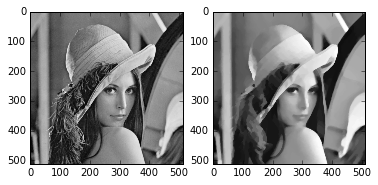

In [20]:
img = imread('assets/Lenna(gray).png') # 원본 출력할 이미지
input_image = imread('assets/Lenna(gauss).png') # 필터링을 할 이미지
copy_image = input_image
filter_size = 7 # 필터 사이즈(홀수여야 한다)
minus= filter_size/2 #for문에서 움직일 크기를 구함 

if filter_size%2==0:
    print "Error : Please input Odd filter_size " #짝수 일경우 (def로 만든 것이 아니라 종료불가)
    
    
plt.imshow(img,cmap = plt.get_cmap('gray')) # 원본 출력 

for i in range (input_image.shape[0]):
    for j in range (input_image.shape[1]): # 픽셀 전부를 돌게 함
        mid=[] # 중간값을 구하기위해 주변 픽셀값을 넣어줄 리스트
        for a in range(i-minus,i+minus+1):
            for b in range(j-minus, j+minus+1): # 필터 크기만큼 돌게 함
                if a<0 or b<0 or a>=input_image.shape[0]or b>=input_image.shape[1]: # 모서리를 넘어가면
                    continue # 넘어가게 한다
                else: # 넘어가는게 아니면 
                    mid.append(copy_image[a][b]) # 값을 리스트에 넣는다.
        mid.sort() #정렬
        length = len(mid) #길이 측정
        if length%2==0: # 길이가 짝수면
            copy_image[i][j]=mid[length/2-1] # 픽셀개수/2 번째를 중간값으로 하여 픽셀값으로 
        else: # 홀수면
            copy_image[i][j]=mid[length/2] # 중간값을 픽셀값으로     
plt.subplot(1,2,1)
plt.imshow(img,cmap = plt.get_cmap('gray')) # 원본 출력

plt.subplot(1,2,2)
plt.imshow(copy_image,cmap = plt.get_cmap('gray')) # 필터링 출력 
imsave('assets/Lenna(filter).png',copy_image)

 # ** 문제 2- Median filter **
 
#### 필터 사이즈에 따라 돌아야 하는 크기가 달라지기에 그 값을 계산해서 minus에 넣었다.
 
#### 필터 내부의 값들을 mid 리스트에 넣어서 sorting한 다음에 개수가 짝수인지 홀수인지를 구해서
 
#### 픽셀값을 짝수라면 픽셀개수/2 번째 숫자으로, 홀수라면 중간값으로 바꿔준다. 

In [8]:
# rms error result
original_image = imread('assets/Lenna(gray).png')
noised_image = imread('assets/Lenna(gauss).png')
filtered_image = imread('assets/Lenna(filter).png')

def rmse(a,b):
    return np.sqrt(np.mean((a-b)**2))
print rmse(original_image, noised_image)
print rmse(original_image, filtered_image)
# plot!


6.27320004367
6.8332544958


# rmse 출력

#### the average of the array elements 을 반환하는 np.mean을 사용하였다.

-----------------------------------------------------------------------------------------------

### 필터 크기 3x3

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 4.64933232262  | 6.5457045936  | 8.03460243405  | 9.28007772216  |
|  필터 | 4.7107006412  |  5.41558666711 | 6.27056674665  |  7.6938658618 |

### 필터 크기 5x5

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 4.64933232262  | 6.5457045936  | 8.03460243405  | 9.28007772216  |
|  필터 | 5.91951654419  | 6.68376411832  |  7.78031431647 |  9.02924617726 |

### **필터 크기 7x7**

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 4.64933232262  | 6.5457045936  | 8.03460243405  | 9.28007772216  |
|  필터 |  6.79090608734 |  7.99942229092 | 9.30685069116  |  9.55627358373 |

### 필터 크기 9x9

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 4.64933232262  | 6.5457045936  | 8.03460243405  | 9.28007772216  |
|  필터 | 7.7116387231  | 9.0728713048  |  9.50859684714 |  9.50543960638 |

### standard deviation: 2

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 0.932982687705  | 1.31959143818  | 1.60933825997  | 1.85979860754  |
|  필터 | 6.00669392068  | 6.02396628982  |  6.04000045776 |  6.07459303509 |

### standard deviation: 4

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 1.80309618525  | 2.55997323857  | 3.12436211751  | 3.60985109566  |
|  필터 | 6.0547394781  | 6.12029100911  |  6.20661516758 |  6.2850831136 |

### standard deviation: 6

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 2.59092392986  | 3.65963718638  | 4.4971435806  | 5.17923197174  |
|  필터 | 6.10512010161  | 6.24881000634  |  6.39767552125 |  6.5512342848 |

### standard deviation: 8

| noise probability  |  0.2 | 0.4  | 0.6  |  0.8 |
|----|----|----|----|----|
| 노이즈 | 3.14275170434  | 4.44078307867  | 5.42626810327  | 6.27126113936  |
|  필터 | 6.17719528157  | 6.38455172764  |  6.58435459505 |  6.79484243585 |

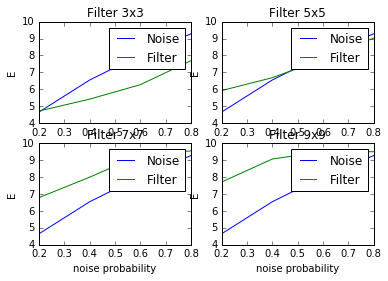

In [21]:
x=[0.2,0.4,0.6,0.8]
noise1 = [4.64933232262, 6.5457045936, 8.03460243405, 9.28007772216]
filter1 = [4.7107006412,  5.41558666711, 6.27056674665,  7.6938658618]
noise2 = [4.64933232262  , 6.5457045936  , 8.03460243405  , 9.28007772216]
filter2 = [5.91951654419  , 6.68376411832  ,  7.78031431647 ,  9.02924617726]
noise3 = [4.64933232262  , 6.5457045936  , 8.03460243405  , 9.28007772216]
filter3 = [6.79090608734 ,  7.99942229092 , 9.30685069116  ,  9.55627358373]
noise4 = [4.64933232262  , 6.5457045936  , 8.03460243405  , 9.28007772216]
filter4 = [7.7116387231  , 9.0728713048  ,  9.50859684714 ,  9.50543960638]
plt.subplot(2,2,1)
plt.plot(x,noise1)
plt.plot(x,filter1)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Filter 3x3')
plt.legend(['Noise','Filter'])

plt.subplot(2,2,2)
plt.plot(x,noise2)
plt.plot(x,filter2)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Filter 5x5')
plt.legend(['Noise','Filter'])

plt.subplot(2,2,3)
plt.plot(x,noise3)
plt.plot(x,filter3)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Filter 7x7')
plt.legend(['Noise','Filter'])

plt.subplot(2,2,4)
plt.plot(x,noise4)
plt.plot(x,filter4)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Filter 9x9')
plt.legend(['Noise','Filter'])

plt.show()

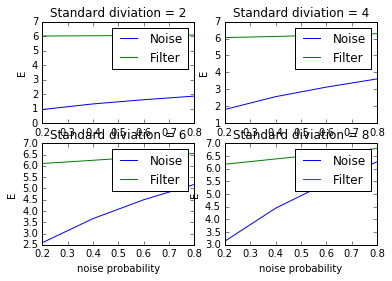

In [10]:
x=[0.2,0.4,0.6,0.8]
noise1 = [ 0.932982687705  , 1.31959143818  , 1.60933825997  , 1.85979860754]
filter1 = [6.00669392068  , 6.02396628982  ,  6.04000045776 ,  6.07459303509]
noise2 = [1.80309618525  , 2.55997323857  , 3.12436211751  , 3.60985109566]
filter2 = [6.0547394781  , 6.12029100911  ,  6.20661516758 ,  6.2850831136]
noise3 = [2.59092392986  , 3.65963718638  , 4.4971435806  , 5.17923197174]
filter3 = [6.10512010161  , 6.24881000634  ,  6.39767552125 ,  6.5512342848 ]
noise4 = [3.14275170434  , 4.44078307867  , 5.42626810327  , 6.27126113936 ]
filter4 = [6.17719528157  , 6.38455172764  ,  6.58435459505 ,  6.79484243585]
plt.subplot(2,2,1)
plt.plot(x,noise1)
plt.plot(x,filter1)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Standard diviation = 2')
plt.legend(['Noise','Filter'])

plt.subplot(2,2,2)
plt.plot(x,noise2)
plt.plot(x,filter2)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Standard diviation = 4')
plt.legend(['Noise','Filter'])

plt.subplot(2,2,3)
plt.plot(x,noise3)
plt.plot(x,filter3)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Standard diviation = 6')
plt.legend(['Noise','Filter'])

plt.subplot(2,2,4)
plt.plot(x,noise4)
plt.plot(x,filter4)
plt.xlabel('noise probability')
plt.ylabel('E')
plt.title('Standard diviation = 8')
plt.legend(['Noise','Filter'])

plt.show()


## ** 느낀점 **

분석결과 salt and pepper의 경우 필터의 크기가 클수록,노이즈 확률이 클수록 노이즈의 세기가 세지고 필터의 성능이 떨어져 원본 이미지와 결과 이미지가 달랐다.

gaussian의 경우 표준편차가 클수록 노이즈 확률이 클수록 노이즈의 세기가 세지고 필터의 성능이 미미하게 떨어져 결과 이미지가 원본과 달랐다. 

또한 gaussian의 경우가 salt and pepper 보다 rmse값이 작게 나왔다.

1학년때 파이썬을 배우기는 했지만 numpy, scipy, matplotlib 을 사용하지 않았기 때문에 내용을 숙지하는데 시간이 조금 걸렸다.

거의 수업내용과 유사한 내용이었기에 하는데 어려움이 없었으나 흑백사진 출력하는 것에서 어려움을 겼었다.

구글링을 하여 imread 'L'옵션과 imshow 에서 cmap 을 gray로 설정하는 것을 이용해서 해결하였다.

노이즈 추가와 필터링의 경우는 행렬 덧셈정도이기 때문에 큰 어려움 없이 해결하였다.

root mean square error를 구하는 것은 mean 메쏘드를 이용해서 한줄로 해결할 수 있었다.

Markdown은 수업때 배운내용이 아니었지만 표도 그릴 수 있고 글씨크기 굵게하기 등등 편리한 기능이 많은 것 같다.

최종 그래프 그리기의 경우 subplot을 이용해 정리하여 그린 결과 그래프가 조금씩 겹쳐서 가독성이 좋지 않은 것 같다.

많이 어려운 텀프는 아니었지만 ipython 사용법과 numpy,scipy,matplotlib의 사용법을 익힐 수 있어서 좋았다.



 